![An image](https://www.fee.unicamp.br/wp-content/uploads/2021/03/feec_2logo_feec_184x73.png)

#Projeto 2 - Análise e Síntese de Sinais de Áudio

EG940 (A) - Prof. Dr. Bruno Sanches Masiero

```
Aluno: Giordano Gatti Gomide - RA:216796
Aluno: Guilherme Rezende de Freitas Leitão - RA:236068
Aluna: Sávia Letícia Menuzzo Quental - RA: 084774
```


#Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import pandas as pd
import scipy.signal as signal
import os

#Acesso aos arquivos

In [4]:
#basta fazer o upload da pasta zipada no colab
!unzip Samples.zip

Archive:  Samples.zip
replace Dataset/Tuba.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/Tuba.wav        
  inflating: Dataset/Orgao.wav       
  inflating: Dataset/Fagote.wav      
  inflating: Dataset/footsteps.wav   
  inflating: Dataset/Oboe.wav        
  inflating: Dataset/Piano.wav       
  inflating: Dataset/Coral.wav       
  inflating: Dataset/city.wav        
  inflating: Dataset/waterfall.wav   
  inflating: Dataset/Tubo secular.wav  
  inflating: Dataset/Sintetizador_3.wav  
  inflating: Dataset/Trombone.wav    
  inflating: Dataset/Sintetizador_1.wav  
  inflating: Dataset/Xilophone.wav   
  inflating: Dataset/Violino.wav     
  inflating: Dataset/Harpa.wav       
  inflating: Dataset/water_splash.wav  
  inflating: Dataset/Viola.wav       
  inflating: Dataset/Trompa.wav      
  inflating: Dataset/old_camera.wav  
  inflating: Dataset/Cello.wav       
  inflating: Dataset/water_flow.wav  
  inflating: Dataset/Sintetizador_4.wav  
  inflating: Dataset/S

#Data Frame


In [5]:
data = {'Filename': ['aircraft.wav', 'Baixo.wav', 'camera.wav', 'car.wav', 'cash_register.wav', 'Cello.wav', 'city.wav', 'Coral.wav', 'engine.wav', 'Fagote.wav',
                     'Flauta.wav', 'footsteps.wav', 'Glockenspie.wav', 'Harpa.wav', 'ice.wav', 'insects.wav', 'Oboe.wav', 'old_camera.wav', 'old_phone_dial.wav', 'Orgao.wav',
                     'Piano.wav', 'printer.wav', 'restaurant.wav', 'ruler.wav', 'sewing_machine.wav', 'Sintetizador_1.wav', 'Sintetizador_2.wav', 'Sintetizador_3.wav', 'Sintetizador_4.wav', 'snore.wav',
                     'store.wav', 'train_bell.wav', 'Trombone.wav', 'Trompa.wav', 'Trompete.wav', 'Tuba.wav', 'Tubo secular.wav', 'Viola.wav', 'Violino.wav', 'water_flow.wav',
                     'water_splash.wav', 'waterfall.wav', 'Xilophone.wav'],
        'Type': ['urbano', 'musical', 'urbano', 'urbano', 'urbano', 'musical', 'urbano', 'musical', 'urbano', 'musical',
                 'musical', 'urbano', 'musical', 'musical', 'urbano', 'urbano', 'musical', 'urbano', 'urbano', 'musical',
                 'musical', 'urbano', 'urbano', 'urbano', 'urbano', 'musical', 'musical', 'musical', 'musical', 'urbano',
                 'urbano', 'urbano', 'musical', 'musical', 'musical', 'musical', 'musical', 'musical', 'musical', 'urbano',
                 'urbano', 'urbano', 'musical']
}

df = pd.DataFrame(data)
print(df)

              Filename     Type
0         aircraft.wav   urbano
1            Baixo.wav  musical
2           camera.wav   urbano
3              car.wav   urbano
4    cash_register.wav   urbano
5            Cello.wav  musical
6             city.wav   urbano
7            Coral.wav  musical
8           engine.wav   urbano
9           Fagote.wav  musical
10          Flauta.wav  musical
11       footsteps.wav   urbano
12     Glockenspie.wav  musical
13           Harpa.wav  musical
14             ice.wav   urbano
15         insects.wav   urbano
16            Oboe.wav  musical
17      old_camera.wav   urbano
18  old_phone_dial.wav   urbano
19           Orgao.wav  musical
20           Piano.wav  musical
21         printer.wav   urbano
22      restaurant.wav   urbano
23           ruler.wav   urbano
24  sewing_machine.wav   urbano
25  Sintetizador_1.wav  musical
26  Sintetizador_2.wav  musical
27  Sintetizador_3.wav  musical
28  Sintetizador_4.wav  musical
29           snore.wav   urbano
30      

In [6]:
# Checando se arquivos existem e taxa de amostragem
n_files = 0
Sr = []
Length = []
classe = []
for index, row in df.iterrows():
  full_fname = 'Dataset/' + row['Filename']
  y, sr = librosa.load(full_fname, sr=None)
  Sr.append(sr)
  Length.append(len(y)/sr)
  classe.append(row['Type'])
  n_files += 1

print("Encontrei "+str(n_files)+" arquivos!" )

if 'Sr [samples/s]' not in df:
  df.insert(2, 'Sr [samples/s]', Sr)
if 'Length [s]' not in df:
  df.insert(3, 'Length [s]', Length)

print(df)

Encontrei 43 arquivos!
              Filename     Type  Sr [samples/s]  Length [s]
0         aircraft.wav   urbano           44100         5.0
1            Baixo.wav  musical           44100         6.4
2           camera.wav   urbano           44100         5.0
3              car.wav   urbano           44100         5.0
4    cash_register.wav   urbano           44100         5.0
5            Cello.wav  musical           44100         6.4
6             city.wav   urbano           44100         5.0
7            Coral.wav  musical           44100         6.4
8           engine.wav   urbano           44100         5.0
9           Fagote.wav  musical           44100         6.4
10          Flauta.wav  musical           44100         6.4
11       footsteps.wav   urbano           44100         5.0
12     Glockenspie.wav  musical           44100         6.4
13           Harpa.wav  musical           44100         6.4
14             ice.wav   urbano           44100         5.0
15         insect

# Extração de Features

In [11]:
def features(audio, frame_size=30):
  x, sr = librosa.load(audio, sr=44100, mono=True)

  # Calcular descritores e janela de textura
  filt = np.hanning(frame_size)

  y0 = librosa.feature.spectral_centroid(y=x)[0,:] #centroid
  y0_ = signal.oaconvolve(filt, y0)

  y1 = librosa.feature.spectral_flatness(y=x)[0,:] #spectral flatness
  y1_ = signal.oaconvolve(filt, y1)

  y2 = librosa.feature.rms(y=x)[0,:] #RMS
  y2_ = signal.oaconvolve(filt, y2)

  return np.array([np.mean(y0_), np.mean(y1_), np.mean(y2_)]) #Média dos vetores

In [12]:
def bad_features(audio, frame_size=30):
  x, sr = librosa.load(audio, sr=44100, mono=True)

  # Calcular descritores e janela de textura
  filt = np.hanning(frame_size)

  y0 = librosa.feature.zero_crossing_rate(y=x)[0,:] #ZCR
  y0_ = signal.oaconvolve(filt, y0)

  y1 = librosa.feature.spectral_rolloff(y=x)[0,:] #spectral rolloff
  y1_ = signal.oaconvolve(filt, y1)

  y2 = librosa.feature.rms(y=x)[0,:] #RMS
  y2_ = signal.oaconvolve(filt, y2)

  return np.array([np.mean(y0_), np.mean(y1_), np.mean(y2_)]) #Média dos vetores

In [15]:
n_files = 0
descritores = []
descritores_contra = []
filenames = []

for index, row in df.iterrows():
  full_fname = 'Dataset/' + row['Filename']
  descritores.append(features(full_fname))
  descritores_contra.append(bad_features(full_fname))
  filenames.append(full_fname)
  n_files += 1

print("Processei "+str(n_files)+" arquivos!" )

descritores = np.array(descritores)
descritores_contra = np.array(descritores_contra)

#print(descritores.shape)
#display(descritores)

Processei 43 arquivos!


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(descritores)
input_data = scaler.transform(descritores) #remove a média e mantem apenas a variancia

bad_scaler = StandardScaler()
bad_scaler.fit(descritores_contra)
bad_input_data = scaler.transform(descritores_contra) #remove a média e mantem apenas a variancia

print(input_data.shape)
display(input_data)

(43, 3)


array([[-0.71266547, -1.06172805,  4.11040672],
       [-0.92916616,  0.04048057,  0.57007738],
       [ 3.42751595,  1.7018897 , -0.81972245],
       [-0.21824103, -1.04040994,  1.643542  ],
       [ 0.62790565, -0.70462029, -0.84251787],
       [-0.60480184,  0.04869933, -0.29436138],
       [-0.53471263, -1.05214658,  0.68382964],
       [-0.61578107,  0.76138563, -0.22785319],
       [-0.60275803, -1.06074896,  0.53044979],
       [-1.00339357,  0.04005634,  0.57470724],
       [-0.1309163 ,  0.26078616, -0.10089054],
       [ 0.96548819, -0.17312924, -0.82123297],
       [ 0.04596055,  3.08549879, -1.1252473 ],
       [-0.89013185,  2.75587019, -0.97894139],
       [-0.16831371, -0.98565257, -0.02667393],
       [ 1.34958595, -0.21784253, -0.46121203],
       [-0.42422497,  0.34850557, -0.28215406],
       [ 3.14160704,  1.33321096, -1.1237647 ],
       [ 1.26704653, -0.35515545, -0.77987284],
       [-1.12396721,  0.83380797,  0.59235785],
       [-0.91256514,  0.16392885, -0.814

#Principal Component Analysis (PCA)

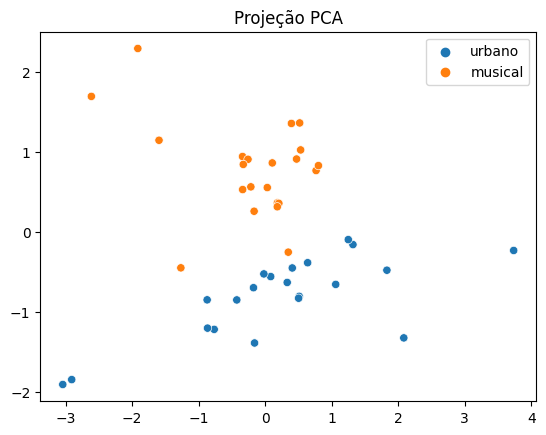

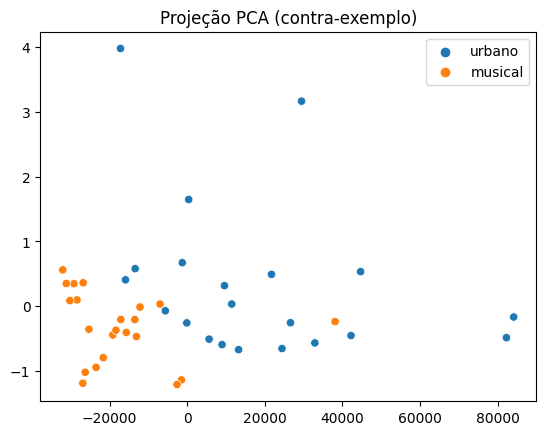

In [18]:
import seaborn as sns
from sklearn.decomposition import PCA

projection = PCA(2)
PCA_projection = projection.fit_transform(input_data)

bad_projection = PCA(2)
bad_PCA_projection = projection.fit_transform(bad_input_data)

plt.figure()
plt.title('Projeção PCA')
sns.scatterplot(x=PCA_projection[:,0], y=PCA_projection[:,1], hue=classe)
plt.show()

plt.figure()
plt.title('Projeção PCA (contra-exemplo)')
sns.scatterplot(x=bad_PCA_projection[:,0], y=bad_PCA_projection[:,1], hue=classe)
plt.show()

#T-Distributed Stochastic Neighbor Embedding (TSNE)

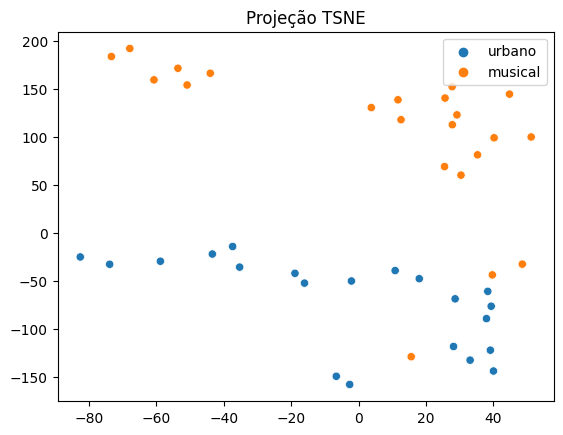

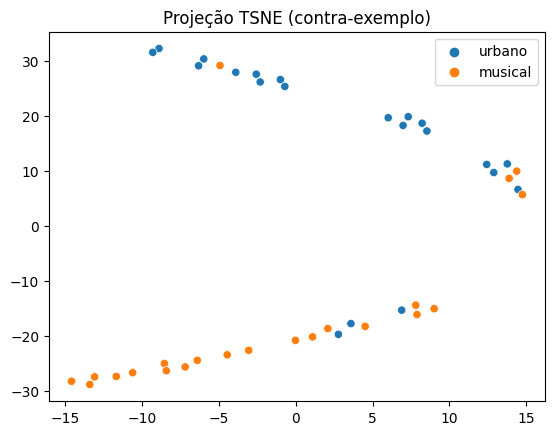

In [21]:
from sklearn.manifold import TSNE

projection = TSNE(2, perplexity=5)
TSNE_projection = projection.fit_transform(input_data)

bad_projection = TSNE(2, perplexity=5)
bad_TSNE_projection = bad_projection.fit_transform(bad_input_data)

plt.figure()
plt.title('Projeção TSNE')
sns.scatterplot(x=TSNE_projection[:,0], y=TSNE_projection[:,1], hue=classe)
plt.show()

plt.figure()
plt.title('Projeção TSNE (contra-exemplo)')
sns.scatterplot(x=bad_TSNE_projection[:,0], y=bad_TSNE_projection[:,1], hue=classe)
plt.show()

#ISOMAP

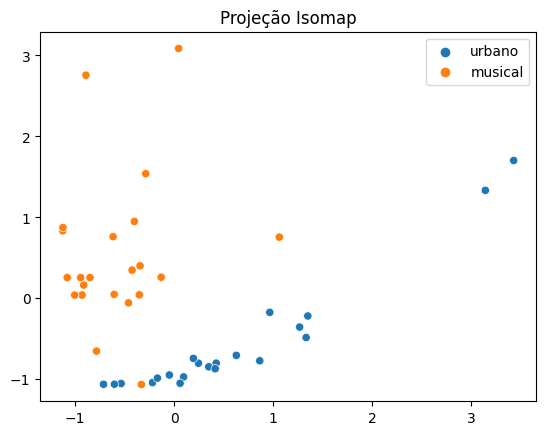

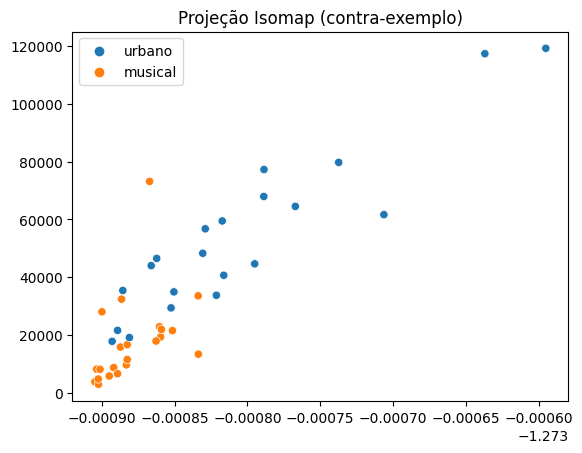

In [23]:
from sklearn.manifold import Isomap

projection = Isomap(n_components=2)
ISOMAP_projection = projection.fit_transform(input_data)

bad_projection = Isomap(n_components=2)
bad_ISOMAP_projection = projection.fit_transform(bad_input_data)

plt.figure()
plt.title('Projeção Isomap')
sns.scatterplot(x=input_data[:,0], y=input_data[:,1], hue=classe)
plt.show()

plt.figure()
plt.title('Projeção Isomap (contra-exemplo)')
sns.scatterplot(x=bad_input_data[:,0], y=bad_input_data[:,1], hue=classe)
plt.show()

#Deep Auto-encoder

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_30 (Dense)            (None, 12)                48        
                                                                 
 dense_31 (Dense)            (None, 9)                 117       
                                                                 
 dense_32 (Dense)            (None, 6)                 60        
                                                                 
 projecao (Dense)            (None, 2)                 14        
                                                                 
 dense_33 (Dense)            (None, 6)                 18        
                                                                 
 dense_34 (Dense)            (None, 9)                 63 

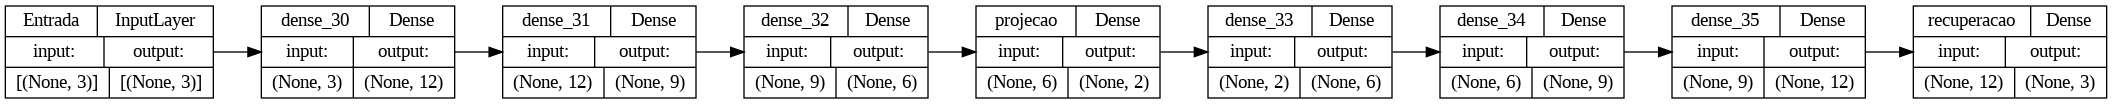

In [40]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.utils import plot_model

def deep_auto_encoder_es(n_inputs, n_intermediario):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  x = layers.Dense(n_inputs*4, activation='relu')(x)
  x = layers.Dense(n_inputs*3, activation='relu', kernel_regularizer='l1')(x)
  x = layers.Dense(n_inputs*2, activation='relu', kernel_regularizer='l2')(x)
  proj = layers.Dense(n_intermediario, activation='relu', name='projecao')(x)
  x = layers.Dense(n_inputs*2, activation='relu', kernel_regularizer='l2')(proj)
  x = layers.Dense(n_inputs*3, activation='relu', kernel_regularizer='l1')(x)
  x = layers.Dense(n_inputs*4, activation='sigmoid')(x)
  x = layers.Dense(n_inputs, name='recuperacao')(x)

  model = Model(inputs=input_layer, outputs=x)
  model_proj = Model(inputs=input_layer, outputs=proj)
  return model, model_proj

modelo, projecao = deep_auto_encoder_es(input_data.shape[1], 2) # Projetando dados em duas dimensoes
modelo.compile(optimizer='rmsprop', loss='mean_squared_error', metrics='accuracy')
modelo.summary()
plot_model(modelo, show_shapes=True, rankdir='LR')
#plot_model(projecao, show_shapes=True, rankdir='LR')

In [43]:
from keras.callbacks import EarlyStopping
# Early Stopping!!
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
history_dae = modelo.fit(x=input_data, y=input_data, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)

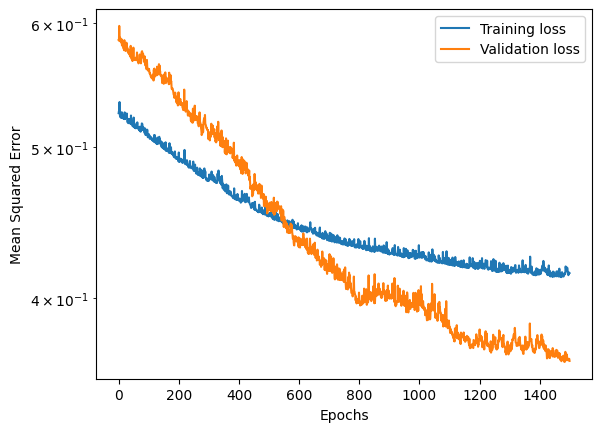

In [44]:
plt.figure()
plt.plot(history_dae.history['loss'], label='Training loss')
plt.plot(history_dae.history['val_loss'], label='Validation loss')
#plt.plot(history_dae.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.semilogy()
plt.legend()
plt.show()

2/2 [==============================] - 0s 6ms/step


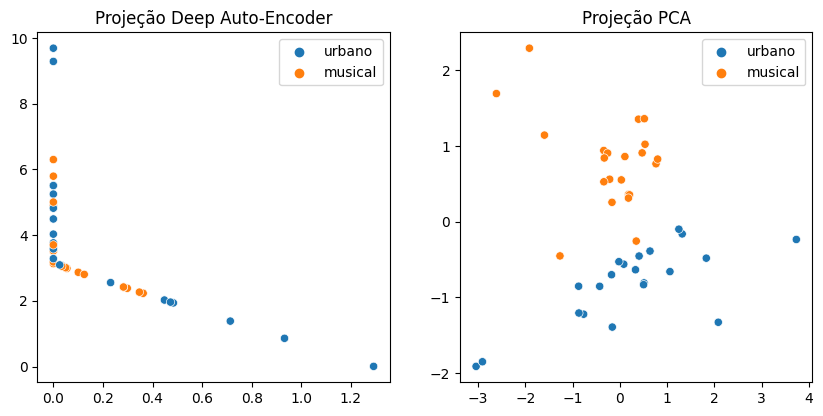

In [45]:
xdae_ = projecao.predict(input_data)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Projeção Deep Auto-Encoder')
sns.scatterplot(x=xdae_[:,0], y=xdae_[:,1], hue=classe)

plt.subplot(222)
plt.title('Projeção PCA')
sns.scatterplot(x=PCA_projection[:,0], y=PCA_projection[:,1], hue=classe)

plt.show()

#Classificador automatico

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#randon_state sets a seed for your random number generator
train_input, test_input, train_output, test_output = train_test_split(input_data, classe, test_size=0.25, random_state=29)

# Projecao por auto-encoder: treinar somente nos dados de treino!
model, proj = deep_auto_encoder_es(input_data.shape[1], 2)
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics='accuracy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
history_dae_train = model.fit(x=train_input, y=train_input, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)

DAE_projection_train = proj.predict(train_input)
DAE_projection_test = proj.predict(test_input)

1/1 [==============================] - 0s 70ms/step


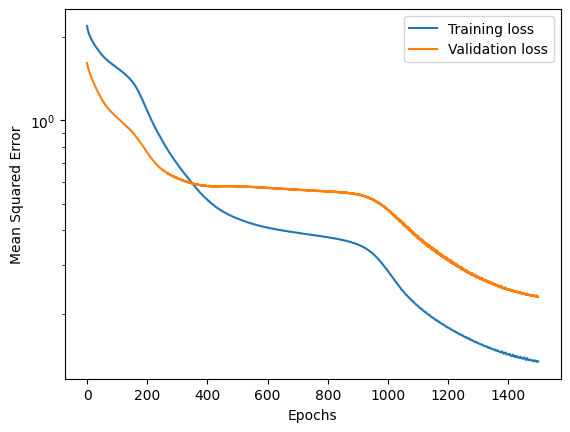

In [30]:
plt.figure()
plt.plot(history_dae_train.history['loss'], label='Training loss')
plt.plot(history_dae_train.history['val_loss'], label='Validation loss')
#plt.plot(history_dae.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.semilogy()
plt.legend()
plt.show()

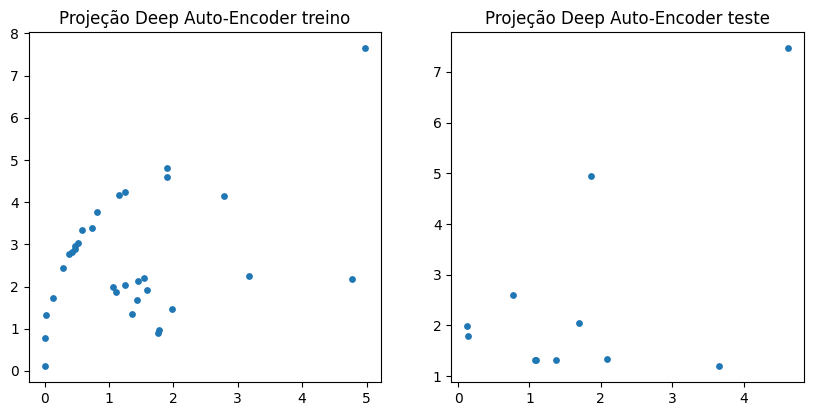

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Projeção Deep Auto-Encoder treino')
plt.scatter(DAE_projection_train[:,0], DAE_projection_train[:,1], s=15)

plt.subplot(222)
plt.title('Projeção Deep Auto-Encoder teste')
plt.scatter(DAE_projection_test[:,0], DAE_projection_test[:,1], s=15)

plt.show()

In [32]:
#classifier = KNeighborsClassifier(n_neighbors=3)
classifier = SVC(C=1, kernel='linear')

classifier.fit(DAE_projection_train, train_output)
classifier_prediction = classifier.predict(DAE_projection_test)

print(classification_report(test_output, classifier_prediction))

              precision    recall  f1-score   support

     musical       1.00      0.86      0.92         7
      urbano       0.80      1.00      0.89         4

    accuracy                           0.91        11
   macro avg       0.90      0.93      0.91        11
weighted avg       0.93      0.91      0.91        11



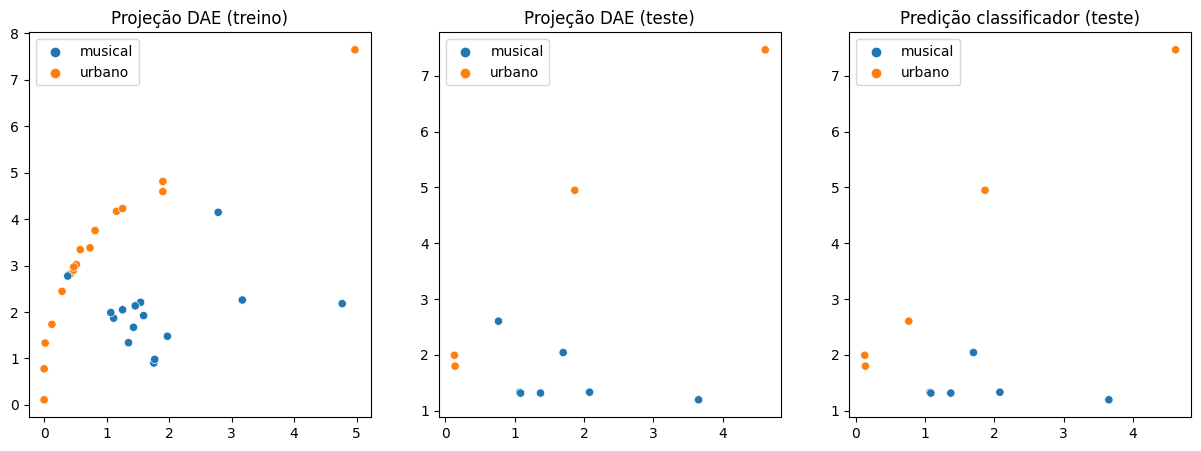

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('Projeção DAE (treino)')
sns.scatterplot(x=DAE_projection_train[:,0], y=DAE_projection_train[:,1], hue=train_output, hue_order=['musical', 'urbano'])

plt.subplot(132)
plt.title('Projeção DAE (teste)')
sns.scatterplot(x=DAE_projection_test[:,0], y=DAE_projection_test[:,1], hue=test_output, hue_order=['musical', 'urbano'])

plt.subplot(133)
plt.title('Predição classificador (teste)')
sns.scatterplot(x=DAE_projection_test[:,0], y=DAE_projection_test[:,1], hue=classifier_prediction, hue_order=['musical', 'urbano'])

plt.show()